## Model 2

#### Data 

In [1]:
import os

dir_path = 'C:/python'
base_dir = (dir_path + '/dogs-vs-cats_small')
train_dir = os.path.join(base_dir, 'train')
dev_dir = os.path.join(base_dir,'dev')
test_dir = os.path.join(base_dir, 'test')

### 3.1 Small networks with data augmentation

We can rotate, shift or zoom each data to get more data. By feeding this augmented data, we can expect model to be better.

ImageDataGenerator can do this with some parameters.

### 3.2 Data augmentation

In [2]:
from keras import models
from keras import layers
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

Using TensorFlow backend.


- rotation_range: Randomly. rotation angle range. (0~180)
- width_shift_range, height_shift_range: Randomly, Parallel movement range. 
- shear_range: Angle for shearing transformation.
- zoom_range: 1 - number ~ 1 + number
- horizontal_flip: Reverse. Not useful for character
- fill_mode: how to fill pixel that has to be filled. 'nearest', 'constant'...

### 3.3 Visualize randomly augmented image

<Figure size 432x288 with 0 Axes>

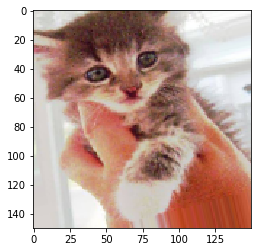

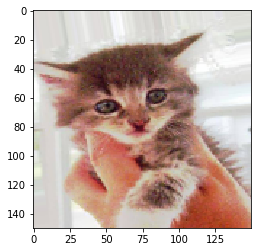

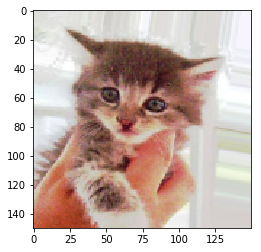

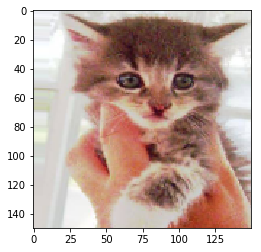

<Figure size 432x288 with 0 Axes>

In [4]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

train_cats_dir = os.path.join(train_dir, 'cats')

fnames= sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)   # Image file to (150, 150, 3) array
x = x.reshape((1,) + x.shape) # Array to (1, 150, 150, 3)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break    # it is infinite. Break for 4
        
plt.figure()

### 3.4 New model with regularization

We augmented image with image we had. But newly generated image has high relationship with original data, and it is just recombination

of information, which means that model could have high variance. So, we need to regularize model.

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(Activation('relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
__________

##### Compile

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### 3.5 Data preprocessing

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for dev set

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
dev_generator = test_datagen.flow_from_directory(dev_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 3.6 Training

In [8]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=dev_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 268s 3s/step - loss: 0.6938 - acc: 0.5131 - val_loss: 0.6820 - val_acc: 0.5419
Epoch 2/100
100/100 [==============================] - 232s 2s/step - loss: 0.6793 - acc: 0.5681 - val_loss: 0.6593 - val_acc: 0.6024
Epoch 3/100
100/100 [==============================] - 233s 2s/step - loss: 0.6752 - acc: 0.5794 - val_loss: 0.6516 - val_acc: 0.6199
Epoch 4/100
100/100 [==============================] - 238s 2s/step - loss: 0.6568 - acc: 0.6103 - val_loss: 0.6992 - val_acc: 0.5541
Epoch 5/100
100/100 [==============================] - 233s 2s/step - loss: 0.6482 - acc: 0.6181 - val_loss: 0.6150 - val_acc: 0.6555
Epoch 6/100
100/100 [==============================] - 233s 2s/step - loss: 0.6232 - acc: 0.6456 - val_loss: 0.7292 - val_acc: 0.5793
Epoch 7/100
100/100 [==============================] - 232s 2s/step - loss: 0.6214 - acc: 0.6550 - val_loss: 0.5974 - val_acc: 0.6548
Epoch 8/100
100/100 [==============================] - 235s 2s

Epoch 62/100
100/100 [==============================] - 241s 2s/step - loss: 0.4160 - acc: 0.8078 - val_loss: 0.6156 - val_acc: 0.7214
Epoch 63/100
100/100 [==============================] - 231s 2s/step - loss: 0.4062 - acc: 0.8144 - val_loss: 0.4098 - val_acc: 0.8170
Epoch 64/100
100/100 [==============================] - 232s 2s/step - loss: 0.4133 - acc: 0.8062 - val_loss: 0.4951 - val_acc: 0.7822
Epoch 65/100
100/100 [==============================] - 233s 2s/step - loss: 0.4073 - acc: 0.8103 - val_loss: 0.5310 - val_acc: 0.7735
Epoch 66/100
100/100 [==============================] - 234s 2s/step - loss: 0.4014 - acc: 0.8147 - val_loss: 0.4356 - val_acc: 0.7912
Epoch 67/100
100/100 [==============================] - 233s 2s/step - loss: 0.4029 - acc: 0.8094 - val_loss: 0.4685 - val_acc: 0.7893
Epoch 68/100
100/100 [==============================] - 234s 2s/step - loss: 0.3942 - acc: 0.8262 - val_loss: 0.4079 - val_acc: 0.8286
Epoch 69/100
100/100 [==============================] -

### Evaluate with graph

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd, numpy as np
sns.set(style="darkgrid")

In [11]:
acc = history.history['acc']
dev_acc = history.history['val_acc']
loss = history.history['loss']
dev_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

In [12]:
model_1_result = pd.DataFrame({'epochs': epochs, 'acc': acc, 'dev_acc': dev_acc, 'loss': loss, 'dev_loss':dev_loss})

<Figure size 432x288 with 0 Axes>

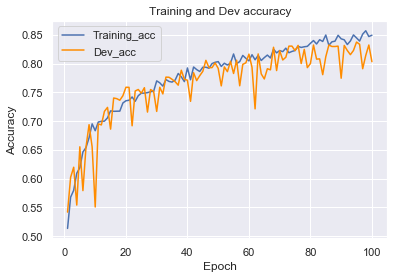

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(epochs, acc, 'b', label='Training_acc')
plt.plot(epochs, dev_acc, 'darkorange', label='Dev_acc')
plt.title("Training and Dev accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

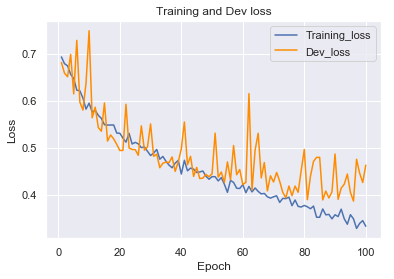

In [14]:
plt.plot(epochs, loss, 'b', label='Training_loss')
plt.plot(epochs, dev_loss, 'darkorange', label='Dev_loss')
plt.title("Training and Dev loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()